In [ ]:
#1.1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

In [2]:
def plot_images_and_histograms(image_name):
    image_color = cv2.imread(image_name)
    image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    #  Otsu  threshold
    thresh_val = threshold_otsu(image_gray)
    binary = image_gray > thresh_val

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    fig.suptitle(f"Segmentation for {image_name}", fontsize=16)

    # colorful
    axes[0, 0].imshow(image_rgb)
    axes[0, 0].set_title("Original (Color)")
    axes[0, 0].axis("off")

    # grey
    axes[0, 1].imshow(image_gray, cmap='gray')
    axes[0, 1].set_title("Grayscale")
    axes[0, 1].axis("off")

    # segmentation
    axes[0, 2].imshow(binary, cmap='gray')
    axes[0, 2].set_title(f"Otsu Thresholding\nThreshold = {thresh_val:.2f}")
    axes[0, 2].axis("off")

    # grey
    axes[1, 0].hist(image_gray.ravel(), bins=256)
    axes[1, 0].axvline(thresh_val, color='red', linestyle='--')
    axes[1, 0].set_title("Grayscale Histogram")
    axes[1, 0].set_xlabel("Pixel Intensity")
    axes[1, 0].set_ylabel("Frequency")

    axes[1, 1].axis("off")
    axes[1, 2].axis("off")

    plt.tight_layout()
    plt.show()

    return thresh_val


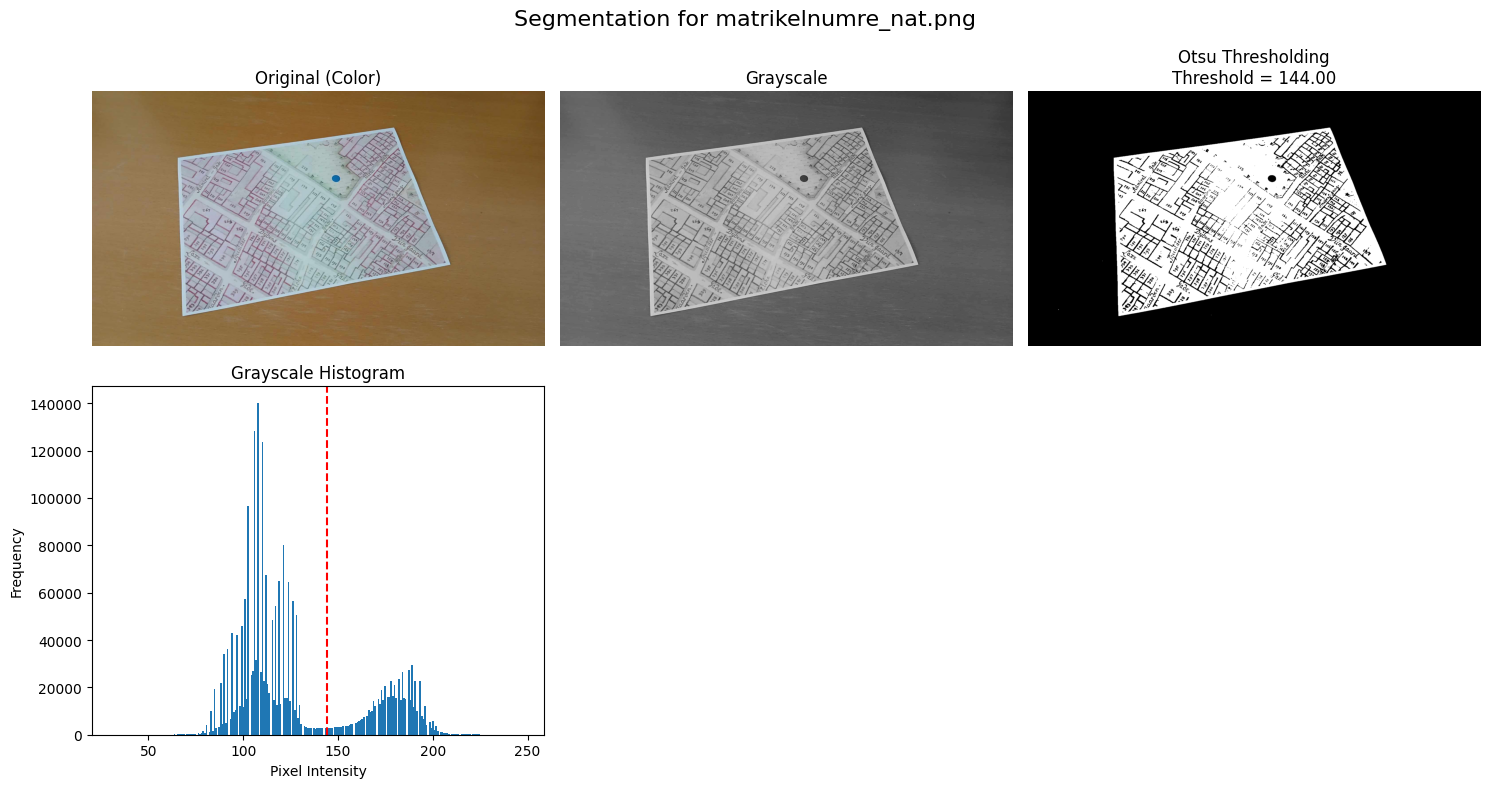

In [3]:
thresh_nat = plot_images_and_histograms("matrikelnumre_nat.png")


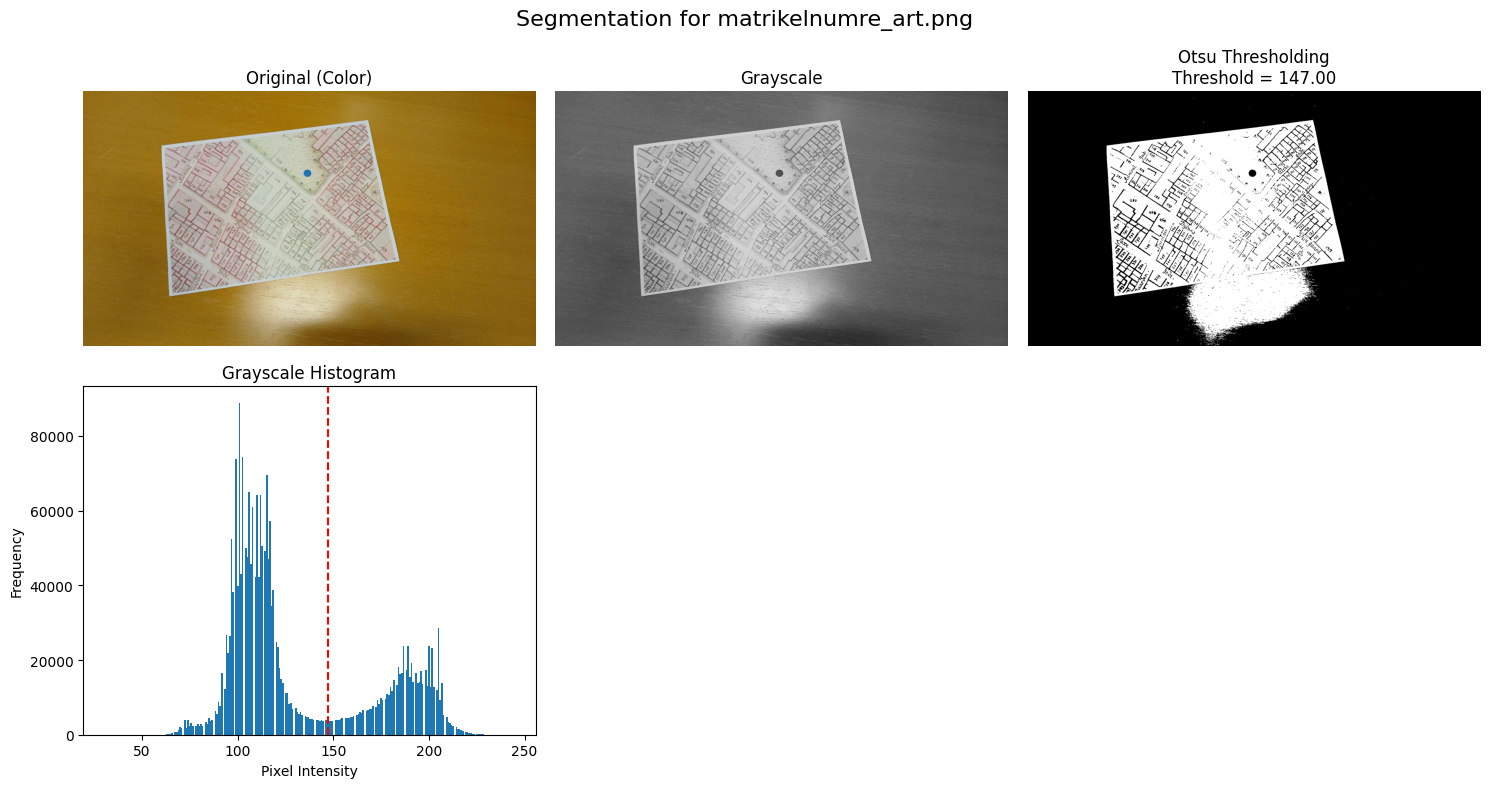

In [4]:
thresh_art = plot_images_and_histograms("matrikelnumre_art.png")

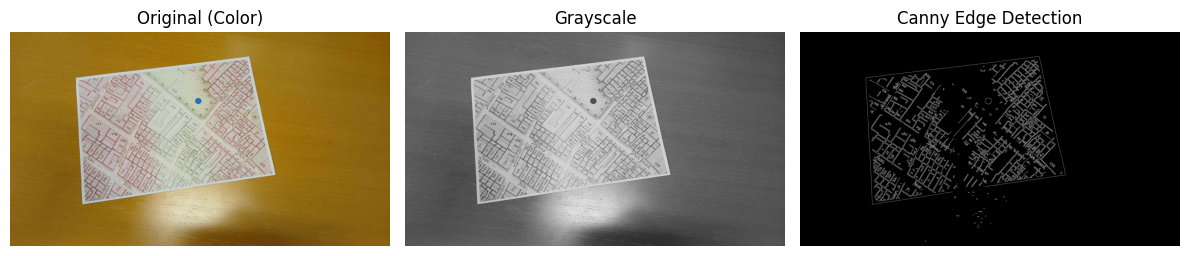

In [5]:
#1.2
image_path = "matrikelnumre_art.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_blur = cv2.GaussianBlur(image_gray, (5, 5), 1.0)

edges = cv2.Canny(image_blur, threshold1=100, threshold2=200)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original (Color)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image_gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()


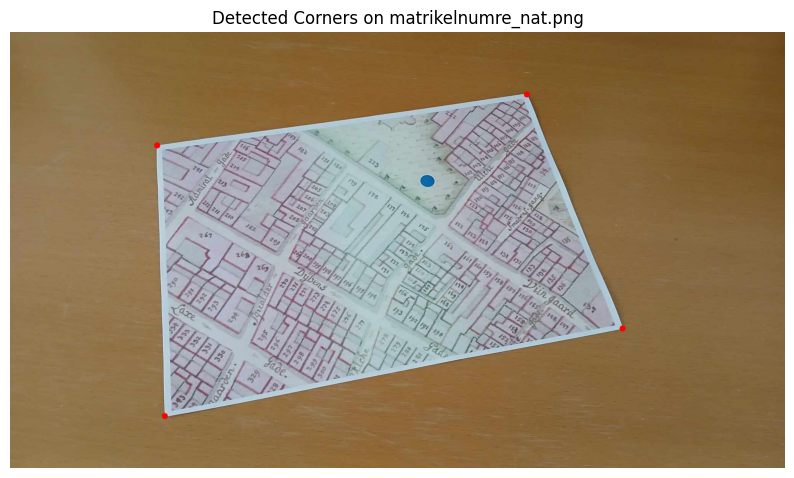

Detected 4 corners (x, y):
(1360, 166)
(387, 300)
(407, 1011)
(1612, 781)


In [9]:
image_path = "matrikelnumre_nat.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocessing: blur + threshold to suppress inner map textures
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
_, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)

#further denoising using morphological opening
kernel = np.ones((5, 5), np.uint8)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Harris corner detection
gray_float = np.float32(opened)
dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Dilate corner response to enhance visibility
dst_dilated = cv2.dilate(dst, None)

# Extract corner coordinates using a threshold
corner_threshold = 0.01 * dst_dilated.max()
corner_coords = np.argwhere(dst_dilated > corner_threshold)
corner_coords = np.flip(corner_coords, axis=1)  # Convert to (x, y)

# Find the largest external contour (assumed to be the map border)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
epsilon = 0.05 * cv2.arcLength(largest_contour, True)
approx_corners = cv2.approxPolyDP(largest_contour, epsilon, True)

# Extract the four corner points
four_corners = [tuple(pt[0]) for pt in approx_corners]

# Draw the detected corners on the image
image_draw = image.copy()
for x, y in four_corners:
    cv2.circle(image_draw, (x, y), radius=8, color=(0, 0, 255), thickness=-1)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.title("Detected Corners on matrikelnumre_nat.png")
plt.axis("off")
plt.show()

# Print the detected corner coordinates
print("Detected 4 corners (x, y):")
for pt in four_corners:
    print(pt)


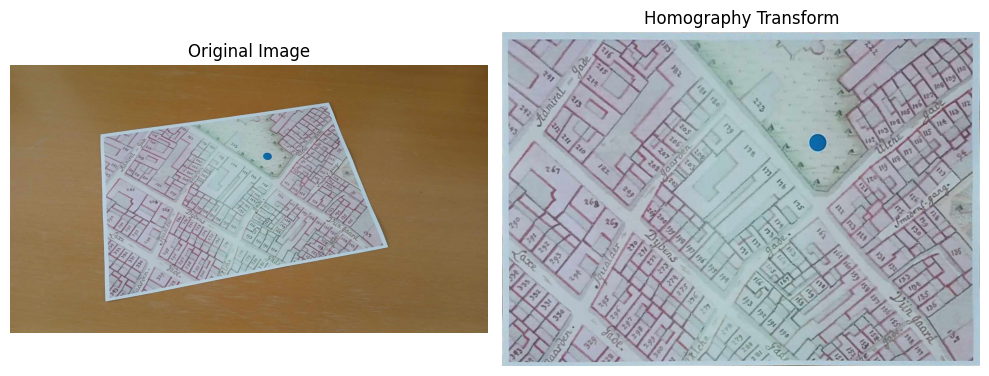

In [10]:
#2.2
image = cv2.imread("matrikelnumre_nat.png")

pts_src = np.array([
    [387, 300],     # top-left
    [1360, 166],    # top-right
    [1612, 781],    # bottom-right
    [407, 1011]     # bottom-left
], dtype=np.float32)

width = 1000
height = 700
pts_dst = np.array([
    [0, 0],                 # top-left
    [width - 1, 0],         # top-right
    [width - 1, height - 1],# bottom-right
    [0, height - 1]         # bottom-left
], dtype=np.float32)

H = cv2.getPerspectiveTransform(pts_src, pts_dst)

warped = cv2.warpPerspective(image, H, (width, height))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title("Homography Transform")
plt.axis("off")

plt.tight_layout()
plt.show()
